In [946]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
from pandas.api.types import is_numeric_dtype, is_string_dtype
wr.filterwarnings('ignore')

In [947]:
df=pd.read_csv("../datasets/diabetic_data.csv")

In [948]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [949]:
df.shape

(101766, 50)

In [950]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [951]:
# from ydata_profiling import ProfileReport
# df.profile_report()

In [952]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [953]:
df.columns.tolist()

['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'age',
 'weight',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'payer_code',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

In [954]:
df["admission_type_id"].value_counts()

admission_type_id
1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: count, dtype: int64

In [955]:
ID_mapping=pd.read_csv("../datasets/IDS_mapping.csv")
print(ID_mapping.columns.tolist())

['admission_type_id', 'description']


In [956]:
# Create separate DataFrames for each section
# Admission Types (rows 1-8)
admission_types = ID_mapping.iloc[0:8].copy()
admission_types.columns = ['admission_type_id', 'description']

# Discharge Dispositions (rows 10-39) 
discharge_dispositions = ID_mapping.iloc[10:40].copy()
discharge_dispositions.columns = ['discharge_disposition_id', 'description']

# Admission Sources (rows 42+)
admission_sources = ID_mapping.iloc[42:].copy() 
admission_sources.columns = ['admission_source_id', 'description']

In [957]:
admission_types.head(8)

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped


In [958]:
df["admission_type_id"]=df["admission_type_id"].replace({1:"Emergency",2:"Emergency",3:"Elective",4:"Newborn",5:"Not Available",
                                                         6:"Not Available",7:"Emergency",8:"Not Available"})
df["admission_type_id"].value_counts()  

admission_type_id
Emergency        72491
Elective         18869
Not Available    10396
Newborn             10
Name: count, dtype: int64

In [959]:
df.drop(df.index[df["admission_type_id"]=="Newborn"],inplace=True)

In [960]:
df["admission_type_id"].value_counts()  

admission_type_id
Emergency        72491
Elective         18869
Not Available    10396
Name: count, dtype: int64

In [961]:
discharge_dispositions.head(30)

,discharge_disposition_id,description
10,1,Discharged to home
11,2,Discharged/transferred to another short term h...
12,3,Discharged/transferred to SNF
13,4,Discharged/transferred to ICF
14,5,Discharged/transferred to another type of inpa...
15,6,Discharged/transferred to home with home healt...
16,7,Left AMA
17,8,Discharged/transferred to home under care of H...
18,9,Admitted as an inpatient to this hospital
19,10,Neonate discharged to another hospital for neo...


In [962]:
df["discharge_disposition_id"]=df["discharge_disposition_id"].replace({
    1: "Discharged to home",
    2: "Transferred to another facility",
    3: "Transferred to another facility",
    4: "Transferred to another facility", 
    5: "Transferred to another facility",
    6: "Discharged to home",
    7: "Left AMA",
    8: "Discharged to home",
    9: "Still patient/referred to this institution",
    10: "Neonate discharged",
    11: "Expired",
    12: "Still patient/referred to this institution",
    13: "Hospice",
    14: "Hospice",
    15: "Still patient/referred to this institution",
    16: "Transferred to another facility",
    17: "Still patient/referred to this institution",
    18: "Not Available",
    19: "Expired",
    20: "Expired",
    21: "Expired",
    22: "Transferred to another facility",
    23: "Transferred to another facility",
    24: "Transferred to another facility",
    25: "Not Available",
    26: "Not Available",
    27: "Transferred to another facility",
    28: "Transferred to another facility",
    29: "Transferred to another facility",
    30: "Transferred to another facility"
})
df["discharge_disposition_id"].value_counts()  

discharge_disposition_id
Discharged to home                            73234
Transferred to another facility               20689
Not Available                                  4680
Expired                                        1652
Hospice                                         771
Left AMA                                        623
Still patient/referred to this institution      101
Neonate discharged                                6
Name: count, dtype: int64

In [963]:
df=df[df['discharge_disposition_id']!='Expired']
df=df[df['discharge_disposition_id']!='Hospice']
df=df[df['discharge_disposition_id']!='Neonate discharged']

In [964]:
df["discharge_disposition_id"].value_counts()  

discharge_disposition_id
Discharged to home                            73234
Transferred to another facility               20689
Not Available                                  4680
Left AMA                                        623
Still patient/referred to this institution      101
Name: count, dtype: int64

In [965]:
df['admission_source_id'].value_counts()

admission_source_id
7     55845
1     29163
17     6570
4      3113
6      2239
2      1081
5       806
3       185
20      159
9       125
8        15
22       12
10        8
11        2
25        2
14        1
13        1
Name: count, dtype: int64

In [966]:
admission_sources.head(25)

,admission_source_id,description
42,1,Physician Referral
43,2,Clinic Referral
44,3,HMO Referral
45,4,Transfer from a hospital
46,5,Transfer from a Skilled Nursing Facility (SNF)
47,6,Transfer from another health care facility
48,7,Emergency Room
49,8,Court/Law Enforcement
50,9,Not Available
51,10,Transfer from critial access hospital


In [967]:
df['admission_source_id'] = df['admission_source_id'].replace({
    1: 'Referral', 2: 'Referral', 3: 'Referral',
    4: 'Transferred from hospital', 5: 'Transferred from hospital', 
    6: 'Transferred from hospital', 10: 'Transferred from hospital', 
    18: 'Transferred from hospital', 19: 'Transferred from hospital', 
    25: 'Transferred from hospital', 26: 'Transferred from hospital', 
    22: 'Transferred from hospital',
    7: 'Emergency', 8: 'Emergency',
    9: 'Not Available', 15: 'Not Available', 17: 'Not Available', 
    20: 'Not Available', 21: 'Not Available',
    11: 'Delivery', 12: 'Delivery', 13: 'Delivery', 14: 'Delivery', 
    23: 'Delivery', 24: 'Delivery'
})
df['admission_source_id'].value_counts()

admission_source_id
Emergency                    55860
Referral                     30429
Not Available                 6854
Transferred from hospital     6180
Delivery                         4
Name: count, dtype: int64

In [968]:
df=df[df['admission_source_id']!='Delivery']

In [969]:
df['admission_source_id'].value_counts()

admission_source_id
Emergency                    55860
Referral                     30429
Not Available                 6854
Transferred from hospital     6180
Name: count, dtype: int64

In [970]:
df.isnull().sum()[df.isnull().sum()>0]

max_glu_serum    94176
A1Cresult        82492
dtype: int64

In [971]:
df[['max_glu_serum' , 'A1Cresult']]

,max_glu_serum,A1Cresult
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
101761,NaN,>8
101762,NaN,NaN
101763,NaN,NaN
101764,NaN,NaN


In [972]:
df.drop(['max_glu_serum' , 'A1Cresult'],axis=1,inplace=True)
print(df.isnull().sum()[df.isnull().sum() > 0])

Series([], dtype: int64)


In [973]:
df.nunique()

encounter_id                99323
patient_nbr                 69973
race                            6
gender                          3
age                            10
weight                         10
admission_type_id               3
discharge_disposition_id        5
admission_source_id             4
time_in_hospital               14
payer_code                     18
medical_specialty              73
num_lab_procedures            118
num_procedures                  7
num_medications                75
number_outpatient              39
number_emergency               33
number_inpatient               21
diag_1                        715
diag_2                        748
diag_3                        787
number_diagnoses               16
metformin                       4
repaglinide                     4
nateglinide                     4
chlorpropamide                  4
glimepiride                     4
acetohexamide                   2
glipizide                       4
glyburide     

In [974]:
df['race'].value_counts()

race
Caucasian          74208
AfricanAmerican    18768
?                   2234
Hispanic            2014
Other               1472
Asian                627
Name: count, dtype: int64

In [975]:
df['race']=df['race'].replace({'?':'Other'})
df['race'].value_counts()

race
Caucasian          74208
AfricanAmerican    18768
Other               3706
Hispanic            2014
Asian                627
Name: count, dtype: int64

In [976]:
df['gender'].value_counts()

gender
Female             53444
Male               45876
Unknown/Invalid        3
Name: count, dtype: int64

In [977]:
df = df[df['gender'] != 'Unknown/Invalid']
df['gender'].value_counts()

gender
Female    53444
Male      45876
Name: count, dtype: int64

In [978]:
df['weight'].value_counts()

weight
?            96197
[75-100)      1311
[50-75)        866
[100-125)      617
[125-150)      143
[25-50)         90
[0-25)          48
[150-175)       34
[175-200)       11
>200             3
Name: count, dtype: int64

In [979]:
df.drop(columns=['weight'], inplace=True)

In [980]:
df['payer_code'].value_counts()

payer_code
?     39386
MC    31332
HM     6195
SP     4941
BC     4601
MD     3472
CP     2462
UN     2410
CM     1876
OG     1011
PO      585
DM      545
CH      142
WC      135
OT       92
MP       79
SI       55
FR        1
Name: count, dtype: int64

In [981]:
df['payer_code'] = df['payer_code'].replace({'?': 'Other'})
df['payer_code'].value_counts()

payer_code
Other    39386
MC       31332
HM        6195
SP        4941
BC        4601
MD        3472
CP        2462
UN        2410
CM        1876
OG        1011
PO         585
DM         545
CH         142
WC         135
OT          92
MP          79
SI          55
FR           1
Name: count, dtype: int64

In [982]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99320 entries, 0 to 101765
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              99320 non-null  int64 
 1   patient_nbr               99320 non-null  int64 
 2   race                      99320 non-null  object
 3   gender                    99320 non-null  object
 4   age                       99320 non-null  object
 5   admission_type_id         99320 non-null  object
 6   discharge_disposition_id  99320 non-null  object
 7   admission_source_id       99320 non-null  object
 8   time_in_hospital          99320 non-null  int64 
 9   payer_code                99320 non-null  object
 10  medical_specialty         99320 non-null  object
 11  num_lab_procedures        99320 non-null  int64 
 12  num_procedures            99320 non-null  int64 
 13  num_medications           99320 non-null  int64 
 14  number_outpatient         

In [983]:
df[['number_outpatient', 'number_emergency', 'number_inpatient']].nunique()

number_outpatient    39
number_emergency     33
number_inpatient     21
dtype: int64

In [984]:
df['total_visits'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']

In [985]:
# Delete the original three columns
df = df.drop(['number_outpatient', 'number_emergency', 'number_inpatient'], axis=1)

In [986]:
df.columns.tolist()

['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'payer_code',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted',
 'total_visits']

In [987]:
df.corr(numeric_only=True)

,encounter_id,patient_nbr,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,total_visits
encounter_id,1.000000,0.513524,-0.063761,-0.028866,-0.013984,0.077011,0.265624,0.108811
patient_nbr,0.513524,1.000000,-0.025053,0.011758,-0.017001,0.021560,0.227668,0.090817
time_in_hospital,-0.063761,-0.025053,1.000000,0.319836,0.190008,0.463805,0.220628,0.031777
num_lab_procedures,-0.028866,0.011758,0.319836,1.000000,0.051856,0.265194,0.149729,0.017344
num_procedures,-0.013984,-0.017001,0.190008,0.051856,1.000000,0.381984,0.070522,-0.066572
num_medications,0.077011,0.021560,0.463805,0.265194,0.381984,1.000000,0.261650,0.066935
number_diagnoses,0.265624,0.227668,0.220628,0.149729,0.070522,0.261650,1.000000,0.132690
total_visits,0.108811,0.090817,0.031777,0.017344,-0.066572,0.066935,0.132690,1.000000


In [988]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted', 'total_visits'],
      dtype='object')

In [989]:
df['age'].value_counts()

age
[70-80)     25322
[60-70)     22054
[50-60)     17058
[80-90)     16431
[40-50)      9606
[30-40)      3764
[90-100)     2588
[20-30)      1648
[10-20)       690
[0-10)        159
Name: count, dtype: int64

In [990]:
df['num_lab_procedures'].head(10)

0    41
1    59
2    11
3    44
4    51
5    31
6    70
7    73
8    68
9    33
Name: num_lab_procedures, dtype: int64

In [991]:
df['time_in_hospital'].value_counts()

time_in_hospital
3     17425
2     16886
1     13822
4     13682
5      9747
6      7354
7      5696
8      4268
9      2878
10     2262
11     1770
12     1383
13     1152
14      995
Name: count, dtype: int64

In [992]:
# Get numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns
# Get categorical columns  
categorical_cols = df.select_dtypes(include=['object']).columns
print("Numerical columns:", numerical_cols.tolist())
print("Categorical columns:", categorical_cols.tolist())

Numerical columns: ['encounter_id', 'patient_nbr', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_diagnoses', 'total_visits']
Categorical columns: ['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


In [993]:
df['payer_code'].value_counts()

payer_code
Other    39386
MC       31332
HM        6195
SP        4941
BC        4601
MD        3472
CP        2462
UN        2410
CM        1876
OG        1011
PO         585
DM         545
CH         142
WC         135
OT          92
MP          79
SI          55
FR           1
Name: count, dtype: int64

In [994]:
sns.set_style("whitegrid") 
sns.set_palette("husl") 

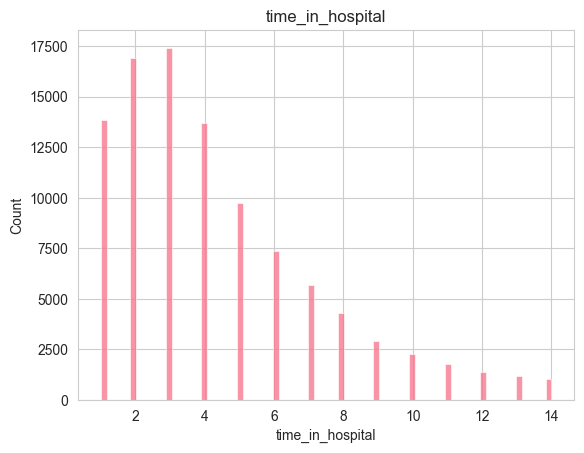

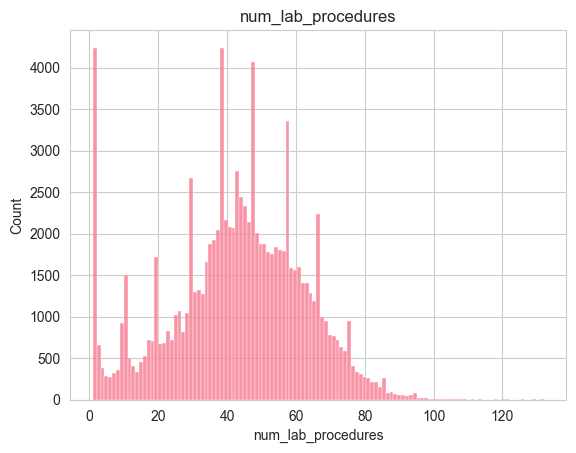

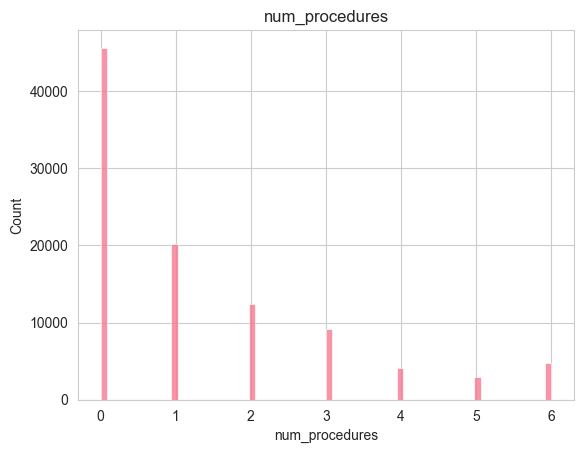

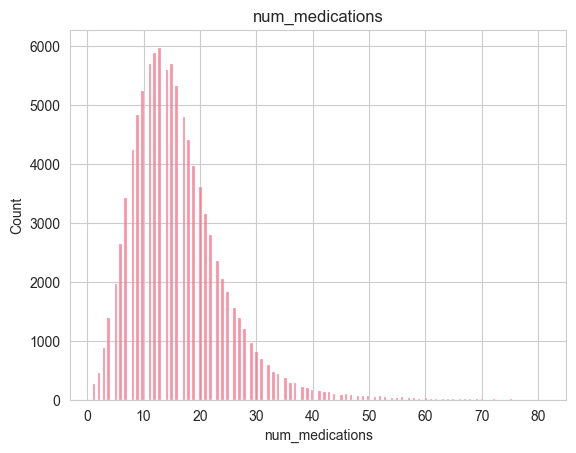

In [995]:
num_col=['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',]
for i in num_col:
    sns.histplot(data=df,x=i)
    plt.title(i)
    plt.show()

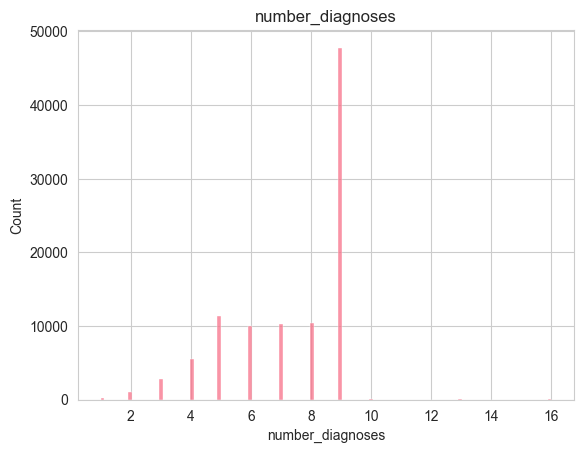

In [996]:
sns.histplot(data=df,x='number_diagnoses')
plt.title('number_diagnoses')
plt.show()

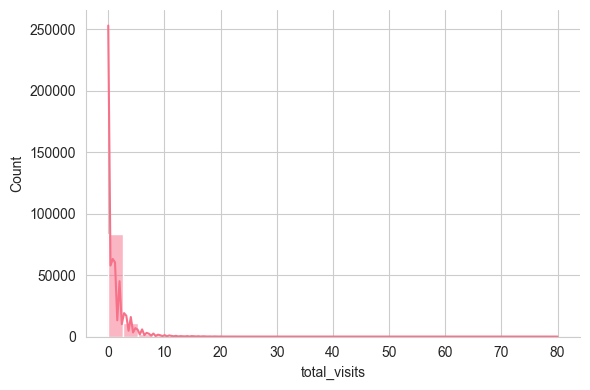

In [997]:
sns.displot(data=df, x='total_visits', bins=30, kde=True, height=4, aspect=1.5)

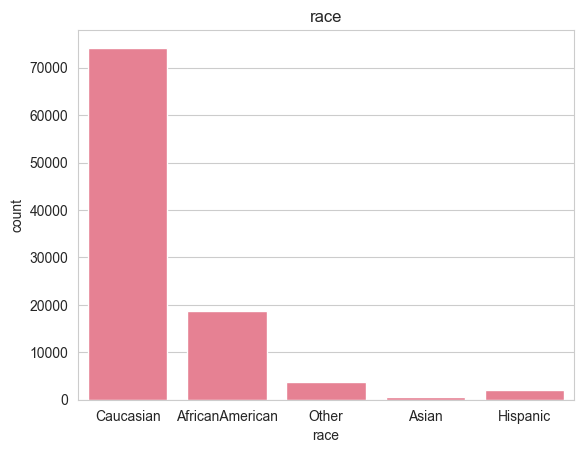

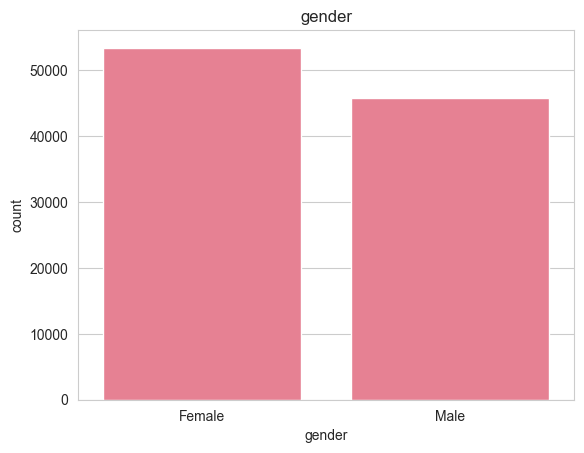

In [998]:
x=['race', 'gender']
for i in x:
    sns.countplot(data=df,x=i)
    plt.title(i)
    plt.show()

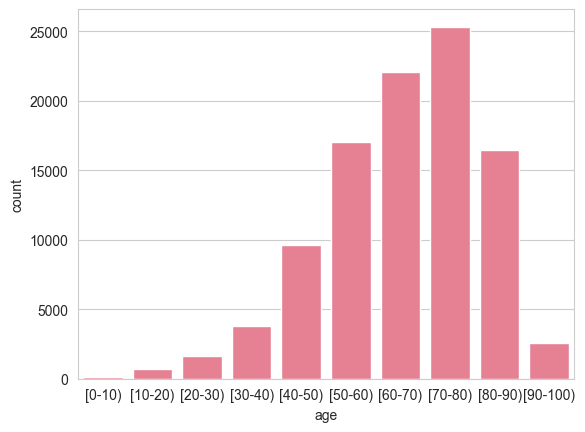

In [999]:
sns.countplot(data=df,x='age')
plt.show()

In [1000]:
x=['admission_type_id','discharge_disposition_id','admission_source_id']

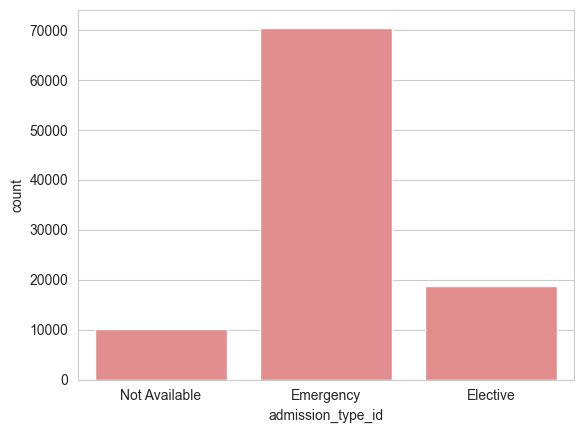

In [1001]:
sns.countplot(data=df, x='admission_type_id',color='lightcoral')
plt.show()

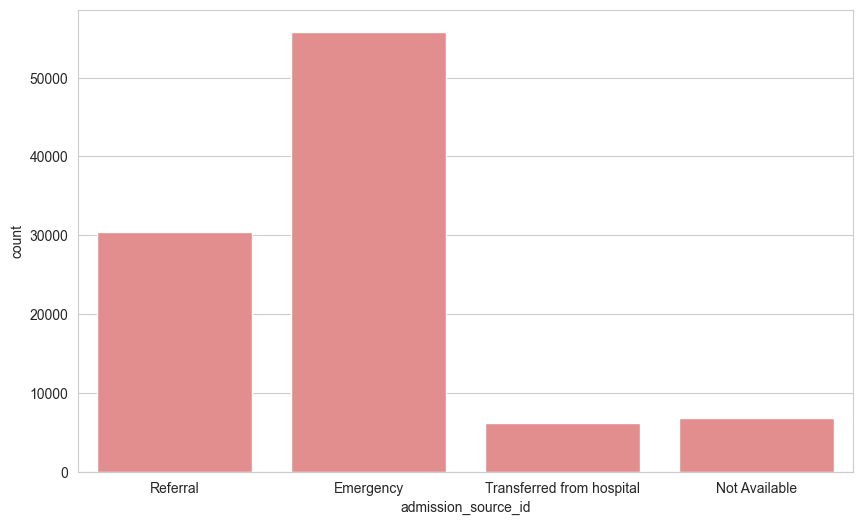

In [1002]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='admission_source_id',color='lightcoral')
plt.show()

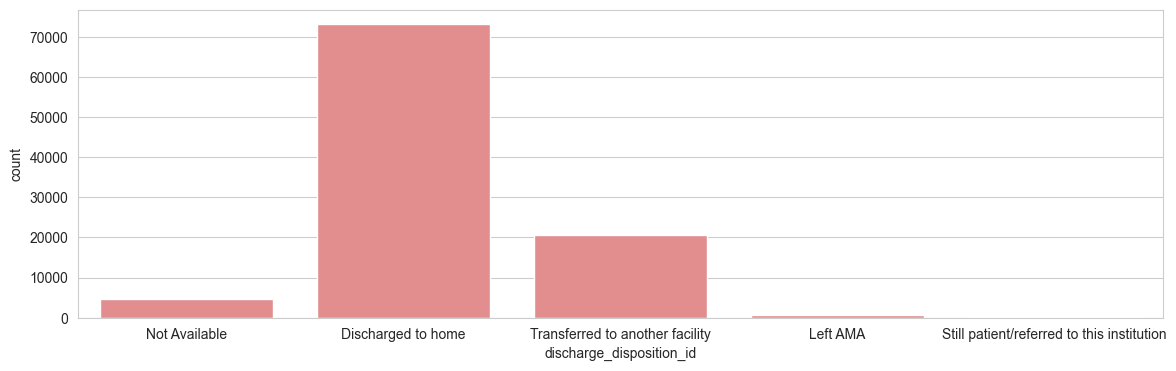

In [1003]:
plt.figure(figsize=(14,4))
sns.countplot(data=df, x='discharge_disposition_id',color='lightcoral')
plt.show()

In [1004]:
categorical_cols.tolist()

['race',
 'gender',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'payer_code',
 'medical_specialty',
 'diag_1',
 'diag_2',
 'diag_3',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

In [1005]:
df['payer_code'].value_counts()

payer_code
Other    39386
MC       31332
HM        6195
SP        4941
BC        4601
MD        3472
CP        2462
UN        2410
CM        1876
OG        1011
PO         585
DM         545
CH         142
WC         135
OT          92
MP          79
SI          55
FR           1
Name: count, dtype: int64

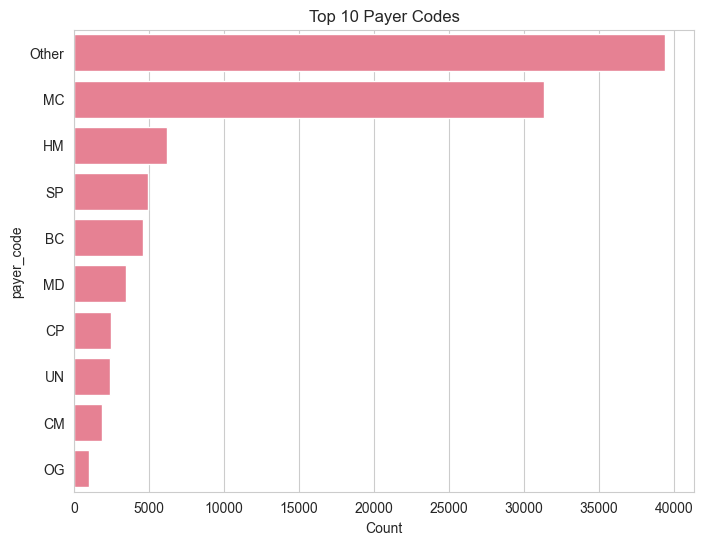

In [1006]:
top_10_payers = df['payer_code'].value_counts().head(10)
df_top10 = df[df['payer_code'].isin(top_10_payers.index)]
plt.figure(figsize=(8, 6))
sns.countplot(data=df_top10, y='payer_code', order=top_10_payers.index)
plt.title('Top 10 Payer Codes')
plt.xlabel('Count')
plt.show()

In [1007]:
x=['medical_specialty',
 'diag_1',
 'diag_2',
 'diag_3']
for i in x:
    print(df[i].value_counts().head(10))

medical_specialty
?                             48599
InternalMedicine              14234
Emergency/Trauma               7419
Family/GeneralPractice         7251
Cardiology                     5278
Surgery-General                3058
Nephrology                     1539
Orthopedics                    1392
Orthopedics-Reconstructive     1230
Radiologist                    1121
Name: count, dtype: int64
diag_1
428    6663
414    6546
786    4014
410    3448
486    3383
427    2719
491    2239
715    2144
682    2029
780    2004
Name: count, dtype: int64
diag_2
276    6588
428    6457
250    6050
427    4891
401    3721
496    3245
599    3211
403    2743
414    2642
411    2548
Name: count, dtype: int64
diag_3
250    11465
401     8233
276     4953
428     4412
427     3785
414     3635
496     2504
403     2277
272     1965
585     1930
Name: count, dtype: int64


In [1008]:
question_marks = (df == '?').sum()
question_marks

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty           48599
num_lab_procedures              0
num_procedures                  0
num_medications                 0
diag_1                         20
diag_2                        356
diag_3                       1419
number_diagnoses                0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone                   0
acarbose      

In [1009]:
question_perc = ((df == '?').sum()/len(df)) * 100
question_perc

encounter_id                 0.000000
patient_nbr                  0.000000
race                         0.000000
gender                       0.000000
age                          0.000000
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                   0.000000
medical_specialty           48.931736
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
diag_1                       0.020137
diag_2                       0.358437
diag_3                       1.428715
number_diagnoses             0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide                  0.000000
chlorpropamide               0.000000
glimepiride                  0.000000
acetohexamide                0.000000
glipizide                    0.000000
glyburide                    0.000000
tolbutamide 

In [1010]:
df['diag_1'] = df['diag_1'].replace('?', 'Unknown')
df['diag_2'] = df['diag_2'].replace('?', 'Unknown') 
df['diag_3'] = df['diag_3'].replace('?', 'Unknown')

In [1011]:
df['medical_specialty'].value_counts().head(10)

medical_specialty
?                             48599
InternalMedicine              14234
Emergency/Trauma               7419
Family/GeneralPractice         7251
Cardiology                     5278
Surgery-General                3058
Nephrology                     1539
Orthopedics                    1392
Orthopedics-Reconstructive     1230
Radiologist                    1121
Name: count, dtype: int64

In [1012]:
df.drop('medical_specialty', axis=1, inplace=True)

In [1013]:
question_perc = ((df == '?').sum()/len(df)) * 100
question_perc

encounter_id                0.0
patient_nbr                 0.0
race                        0.0
gender                      0.0
age                         0.0
admission_type_id           0.0
discharge_disposition_id    0.0
admission_source_id         0.0
time_in_hospital            0.0
payer_code                  0.0
num_lab_procedures          0.0
num_procedures              0.0
num_medications             0.0
diag_1                      0.0
diag_2                      0.0
diag_3                      0.0
number_diagnoses            0.0
metformin                   0.0
repaglinide                 0.0
nateglinide                 0.0
chlorpropamide              0.0
glimepiride                 0.0
acetohexamide               0.0
glipizide                   0.0
glyburide                   0.0
tolbutamide                 0.0
pioglitazone                0.0
rosiglitazone               0.0
acarbose                    0.0
miglitol                    0.0
troglitazone                0.0
tolazami

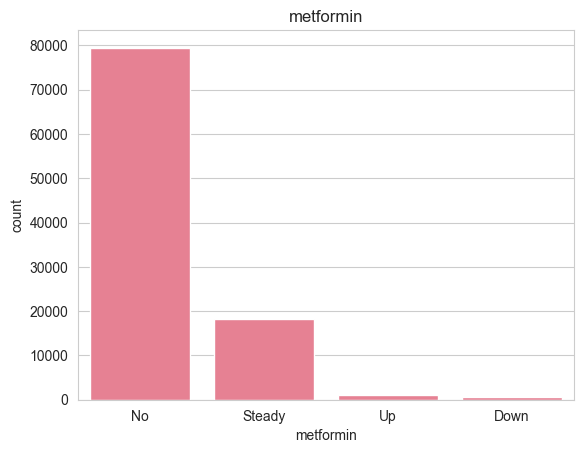

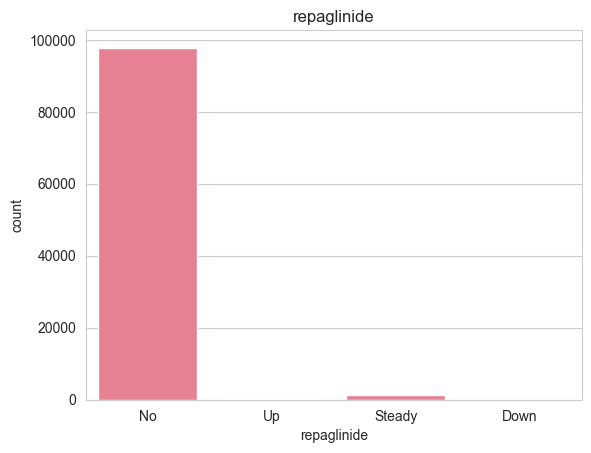

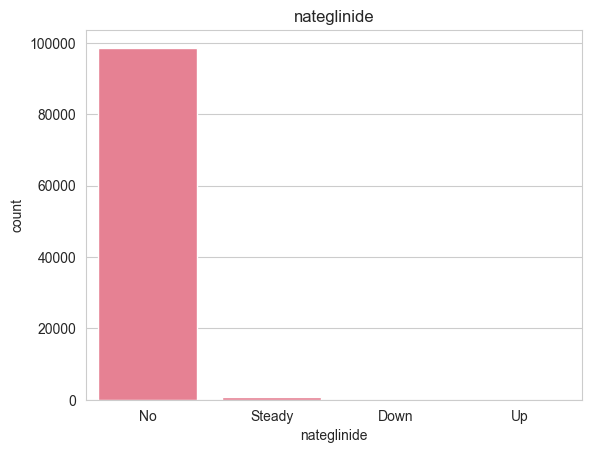

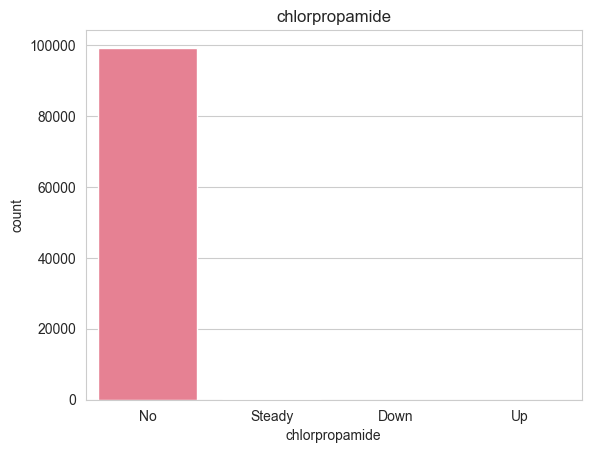

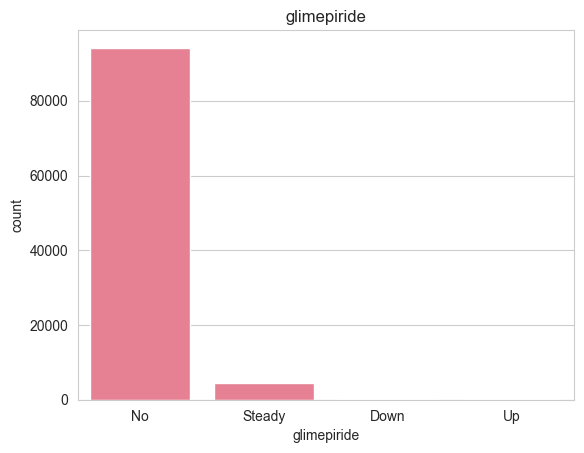

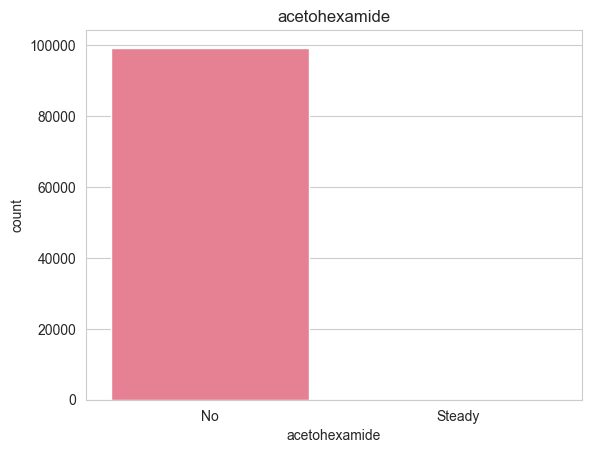

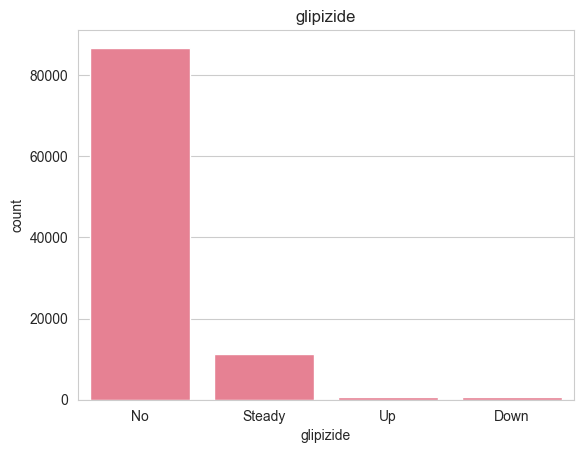

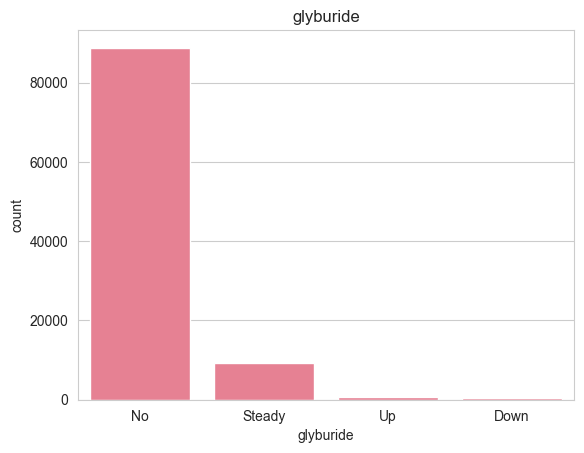

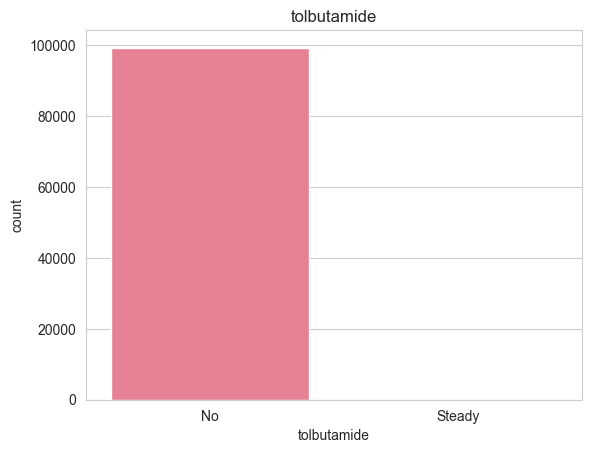

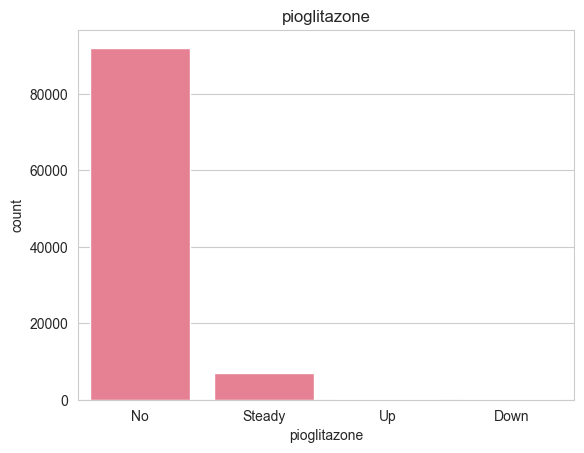

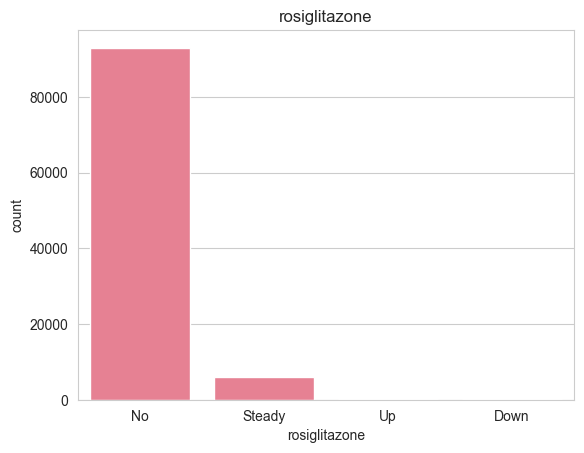

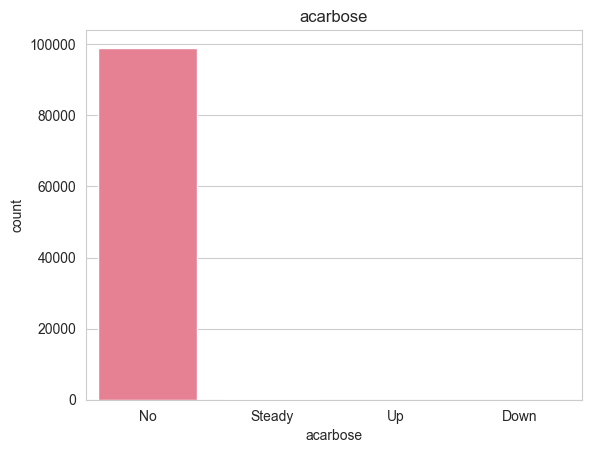

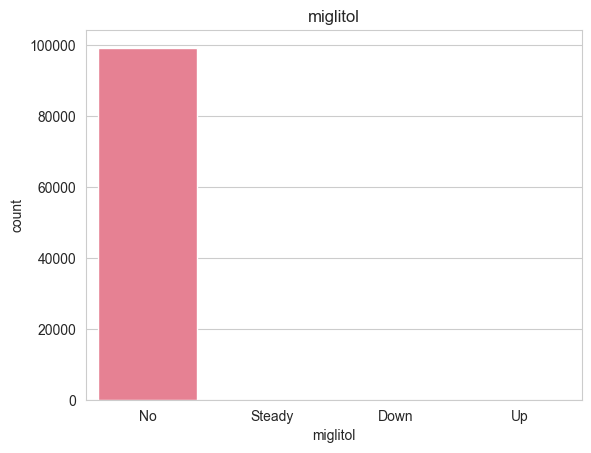

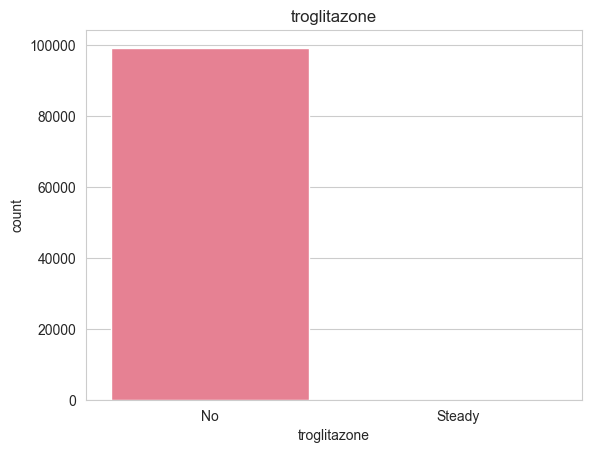

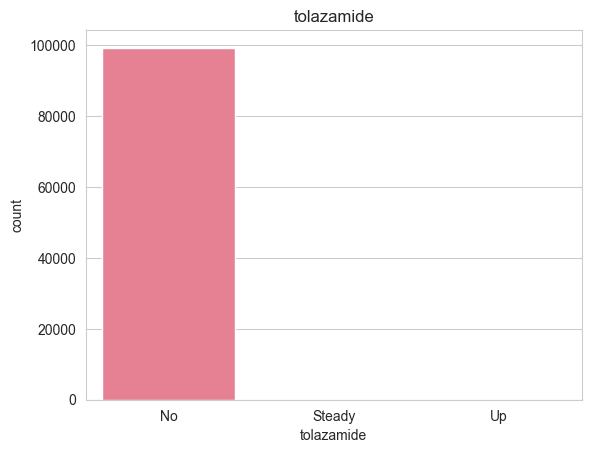

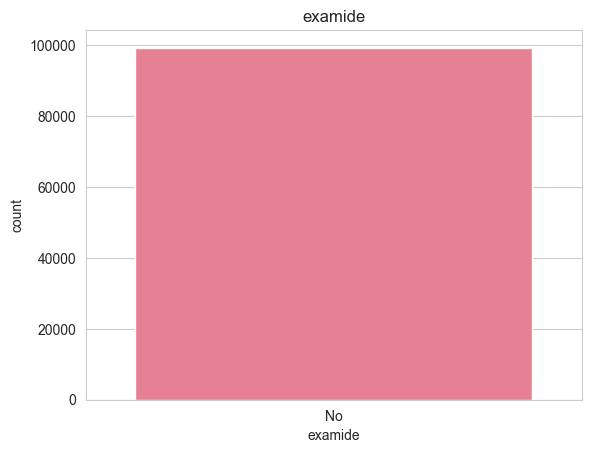

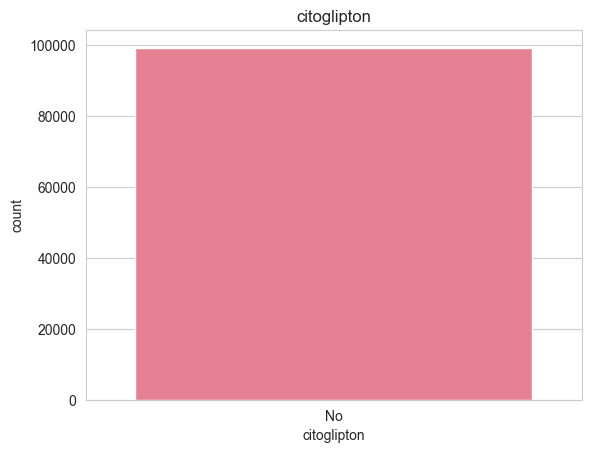

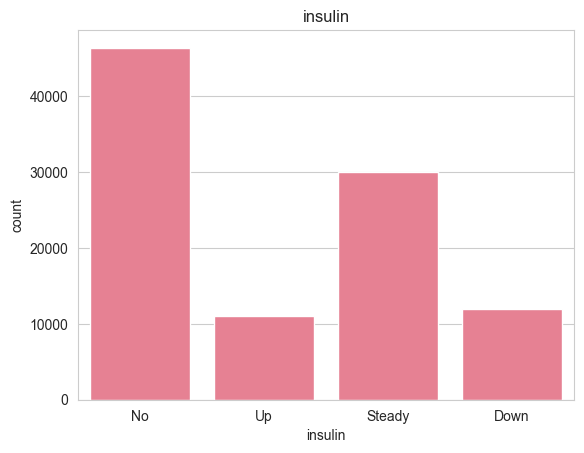

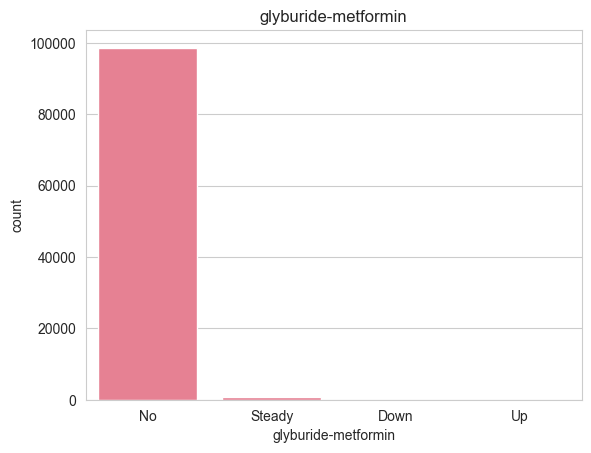

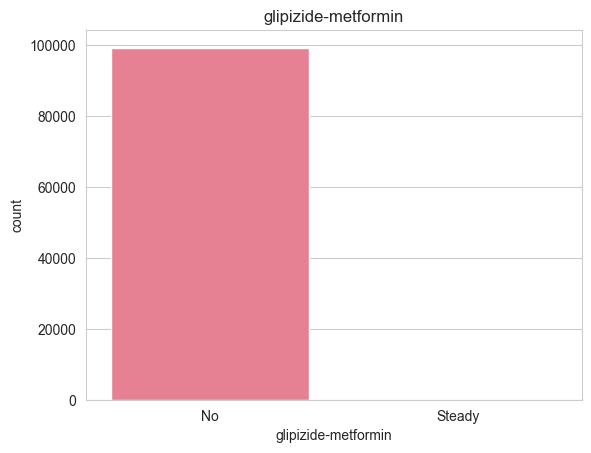

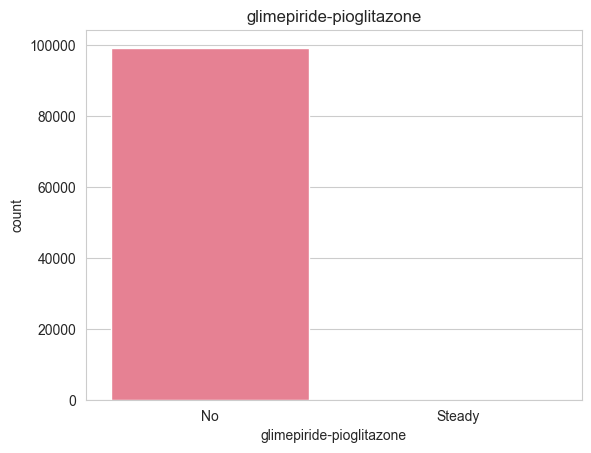

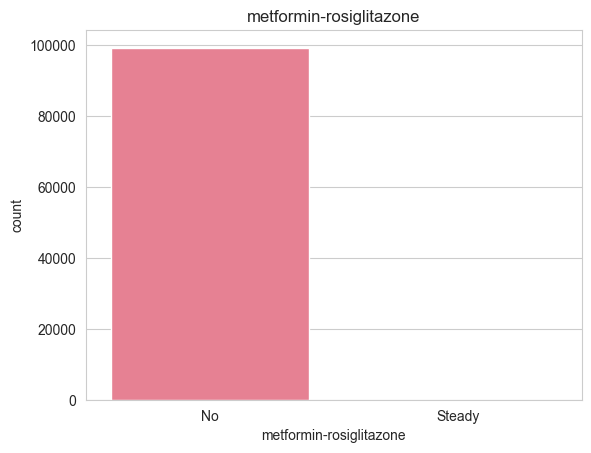

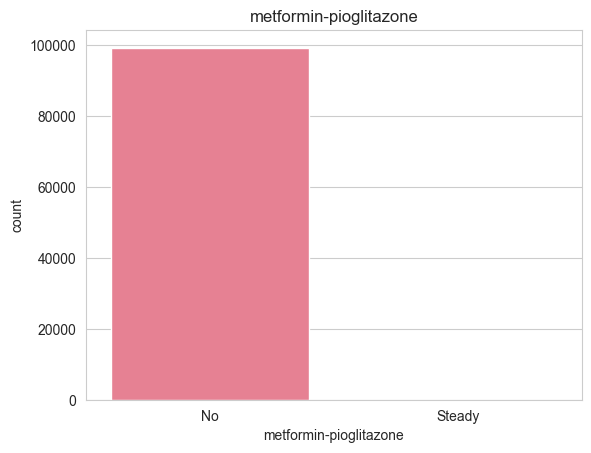

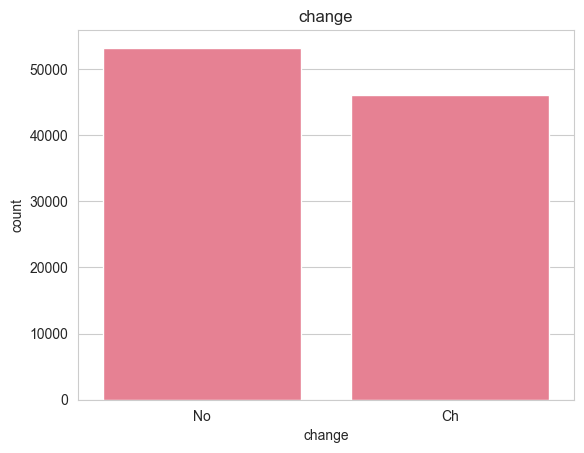

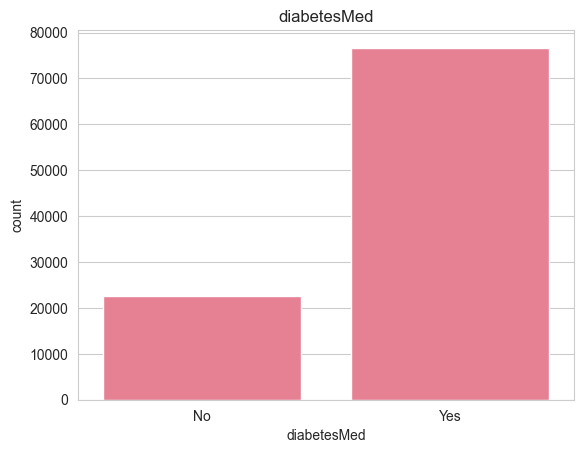

In [1014]:
x=['metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed']
for i in x:
    sns.countplot(data=df,x=i)
    plt.title(i)
    plt.show()

In [1015]:
for i in x:
    perc_med = (df[i].value_counts() / len(df)) * 100  # Use len(df)
    print(f"\n{i}:")
    print(perc_med)


metformin:
metformin
No        80.022151
Steady    18.329642
Up         1.070278
Down       0.577930
Name: count, dtype: float64

repaglinide:
repaglinide
No        98.471607
Steady     1.377366
Up         0.107733
Down       0.043294
Name: count, dtype: float64

nateglinide:
nateglinide
No        99.306283
Steady     0.658478
Up         0.024164
Down       0.011075
Name: count, dtype: float64

chlorpropamide:
chlorpropamide
No        99.915425
Steady     0.077527
Up         0.006041
Down       0.001007
Name: count, dtype: float64

glimepiride:
glimepiride
No        94.843939
Steady     4.639549
Up         0.324205
Down       0.192308
Name: count, dtype: float64

acetohexamide:
acetohexamide
No        99.998993
Steady     0.001007
Name: count, dtype: float64

glipizide:
glipizide
No        87.386226
Steady    11.292791
Up         0.769231
Down       0.551752
Name: count, dtype: float64

glyburide:
glyburide
No        89.406967
Steady     9.222714
Up         0.806484
Down       0.56383

In [1016]:
x=['metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',]
df.drop(x, axis=1, inplace=True)

In [1017]:
df.shape

(99320, 22)

In [1018]:
numerical_cols.tolist()

['encounter_id',
 'patient_nbr',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_diagnoses',
 'total_visits']

In [1019]:
x=['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_diagnoses',
 'total_visits']
for i in x:
    x_skew=df[i].skew()
    print(f"{i}: {x_skew:.2f}")

time_in_hospital: 1.14
num_lab_procedures: -0.24
num_procedures: 1.32
num_medications: 1.34
number_diagnoses: -0.86
total_visits: 5.35


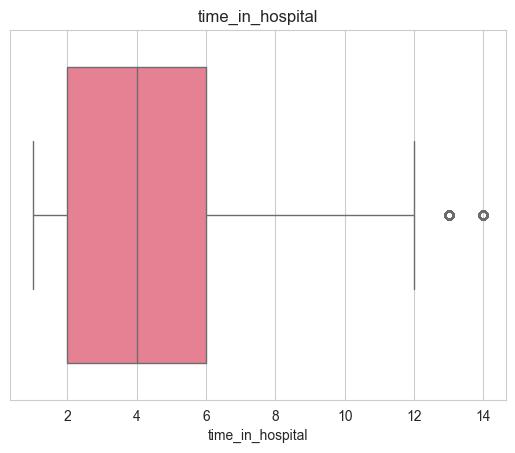

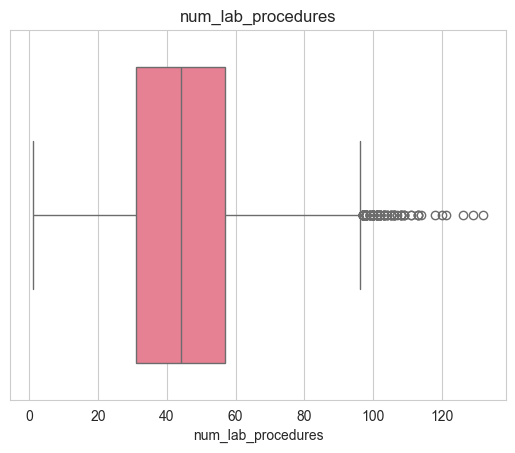

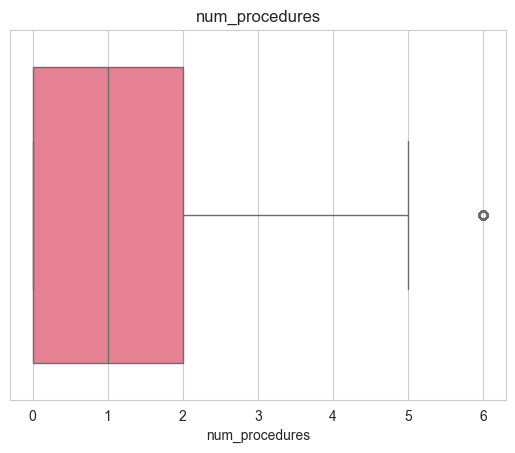

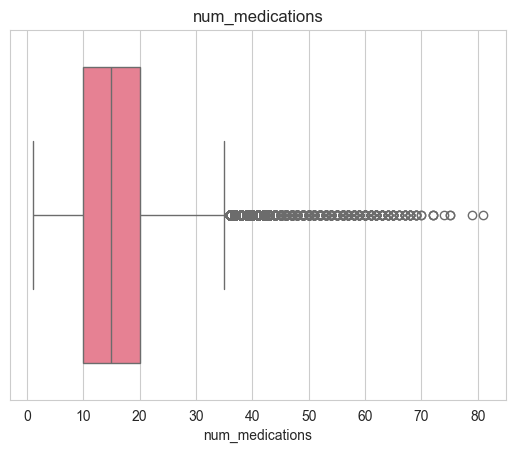

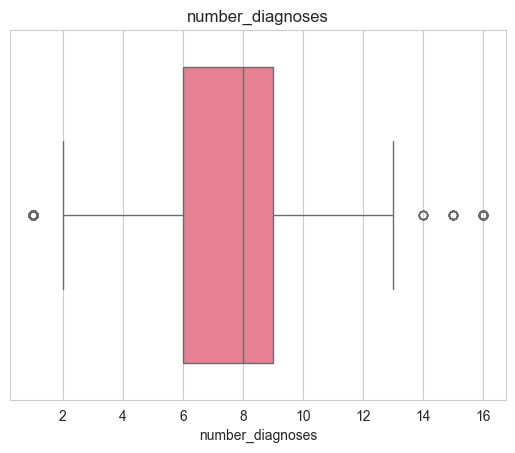

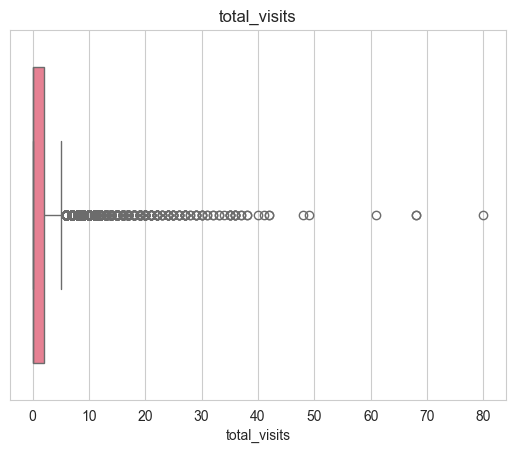

In [1020]:
for i in x:
    sns.boxplot(data=df,x=i)
    plt.title(i)
    plt.show()

In [1021]:
# Get numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns
# Get categorical columns  
categorical_cols = df.select_dtypes(include=['object']).columns
print("Numerical columns:", numerical_cols.tolist())
print("Categorical columns:", categorical_cols.tolist())

Numerical columns: ['encounter_id', 'patient_nbr', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_diagnoses', 'total_visits']
Categorical columns: ['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'payer_code', 'diag_1', 'diag_2', 'diag_3', 'insulin', 'change', 'diabetesMed', 'readmitted']


In [1022]:
num_cols=['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_diagnoses', 'total_visits']
cat_cols=['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'payer_code', 'diag_1', 'diag_2', 'diag_3',
          'insulin', 'change', 'diabetesMed']
target='readmitted'

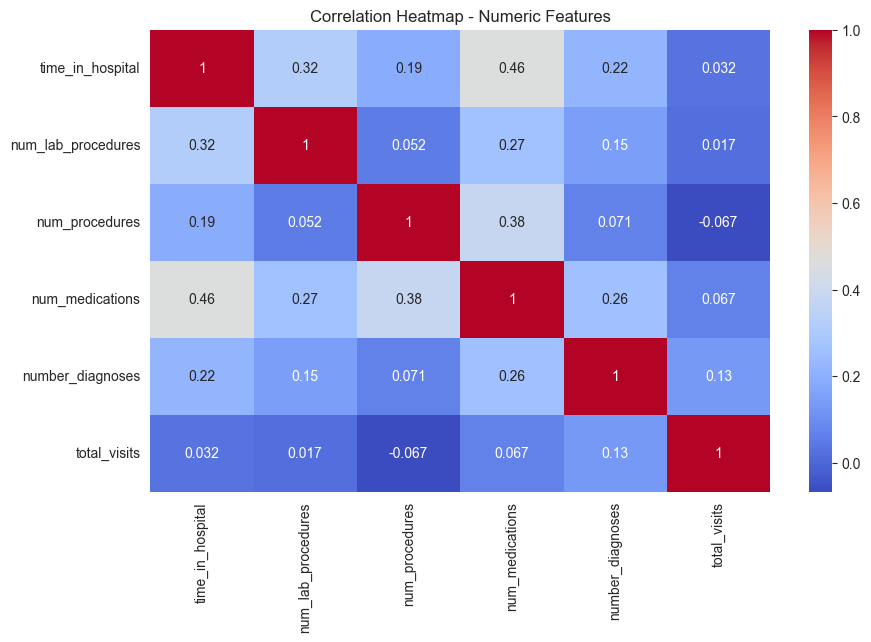

In [1023]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap - Numeric Features")
plt.show()

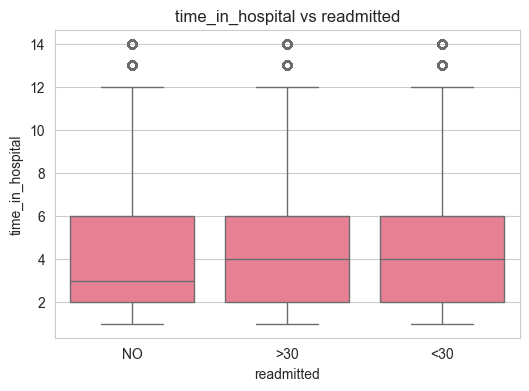

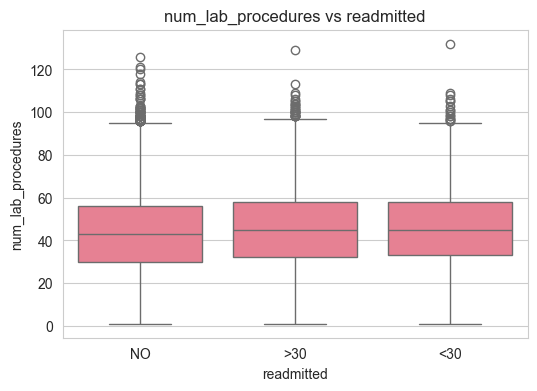

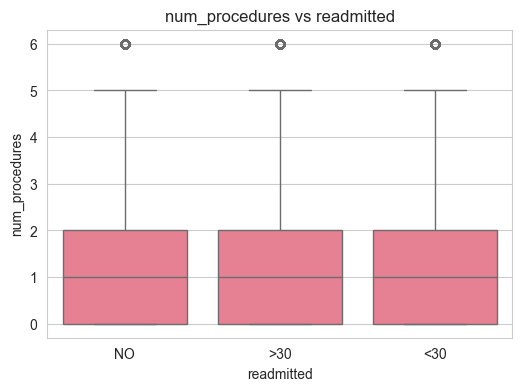

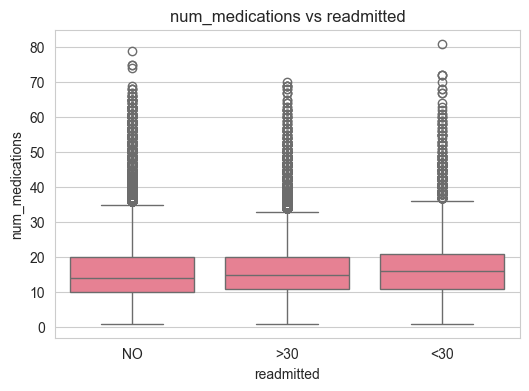

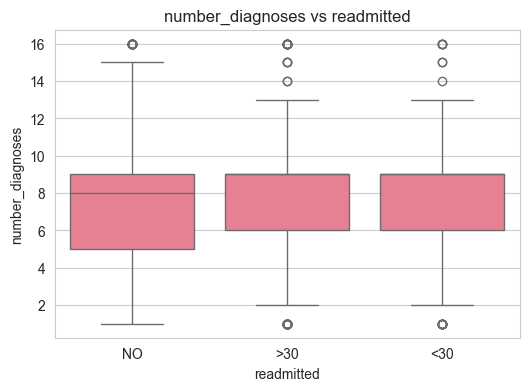

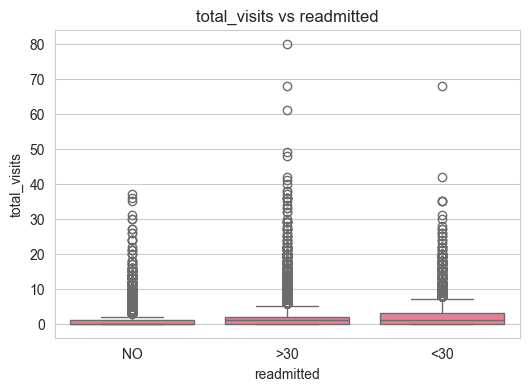

In [1024]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=target, y=col, data=df)
    plt.title(f"{col} vs {target}")
    plt.show()

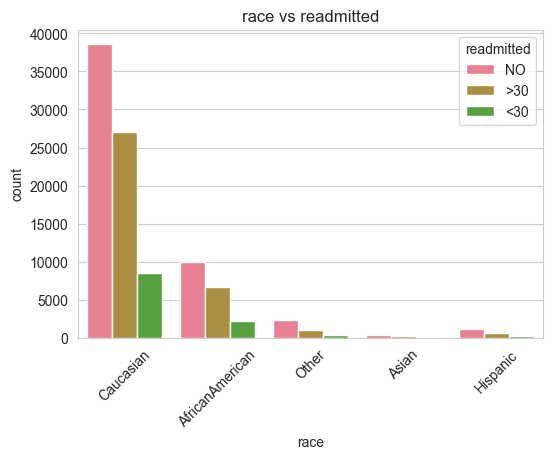

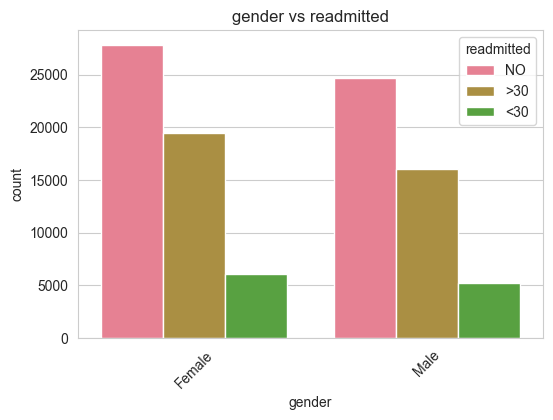

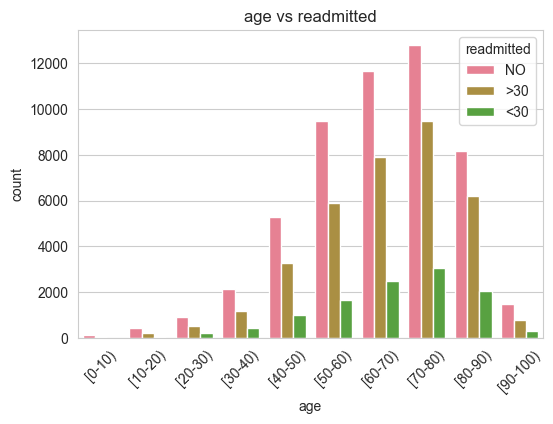

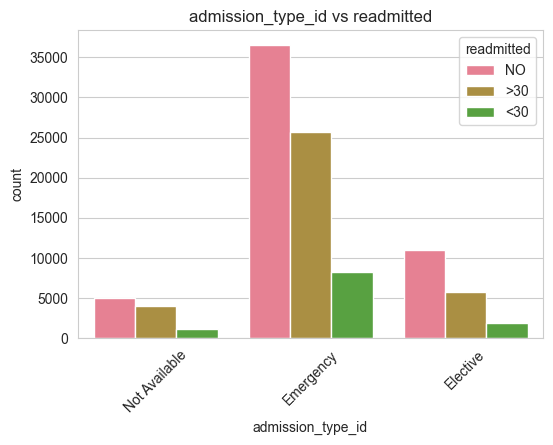

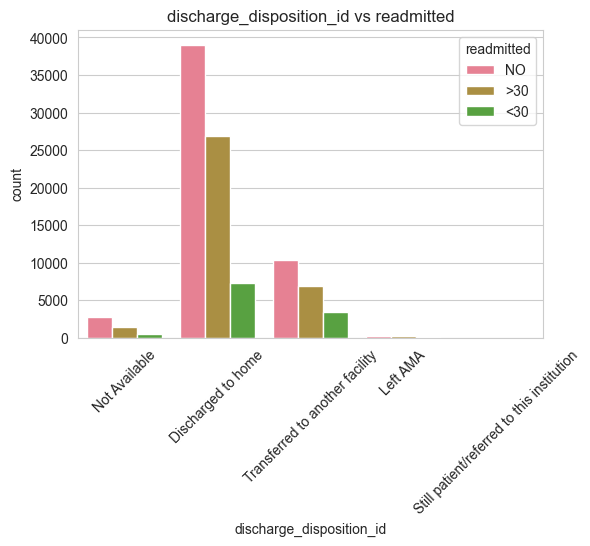

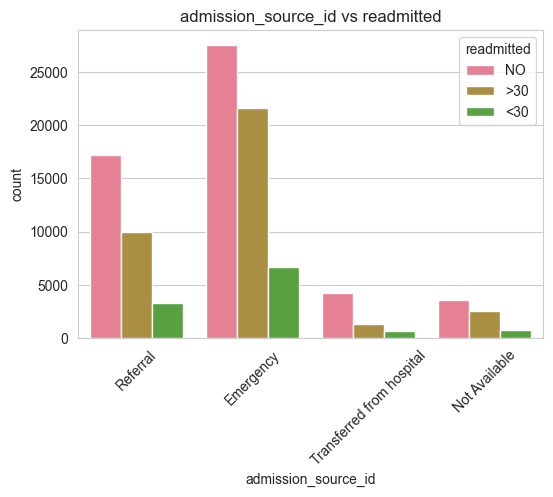

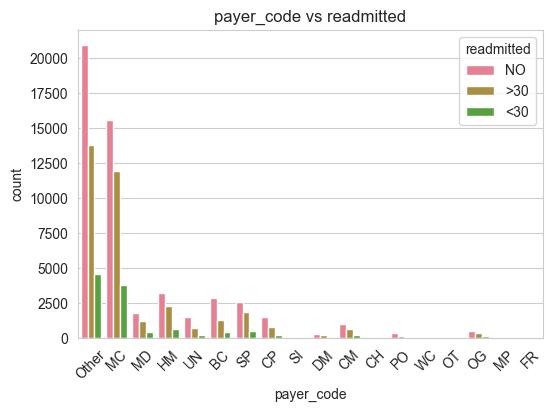

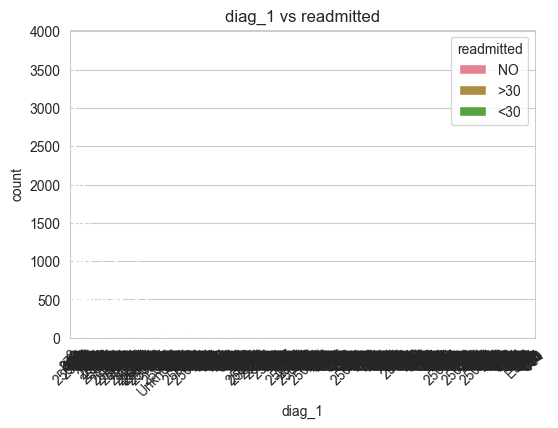

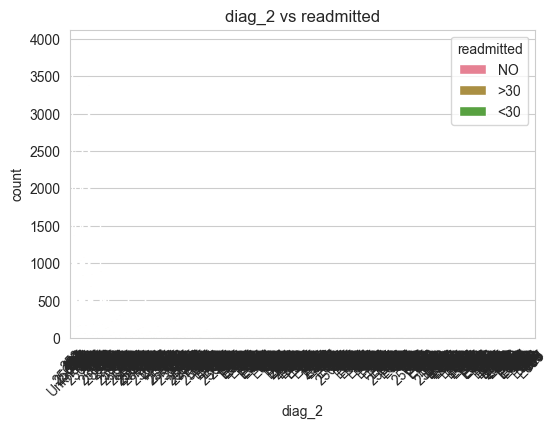

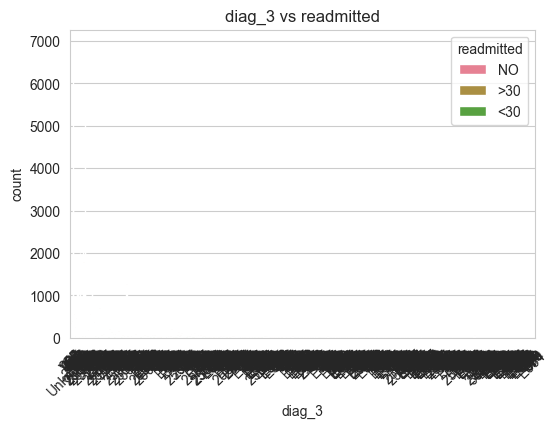

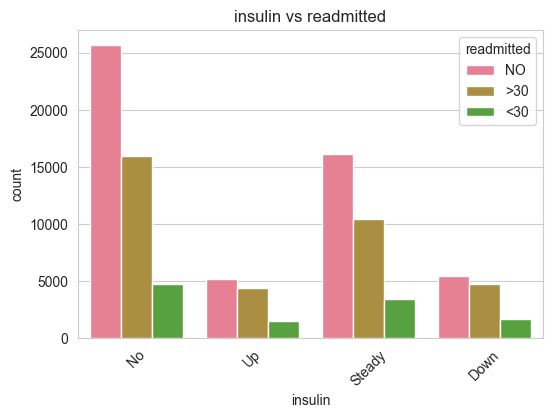

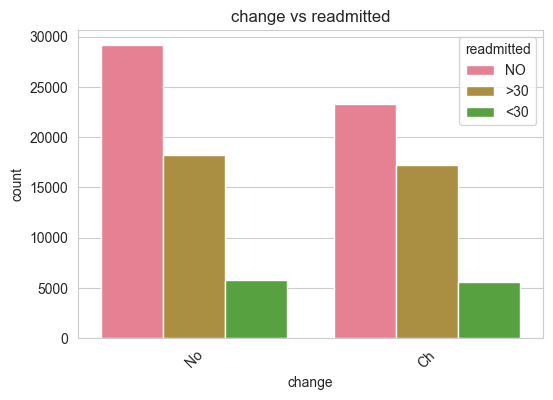

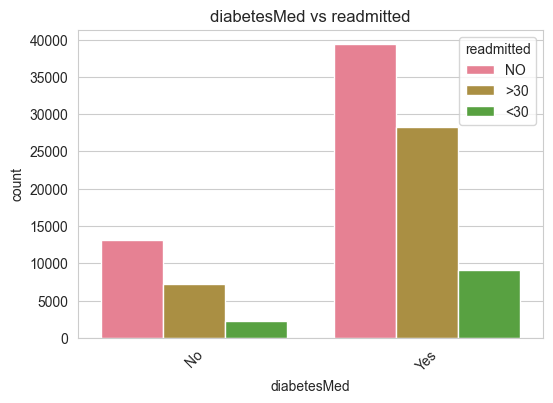

In [1025]:
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue=target, data=df)
    plt.title(f"{col} vs {target}")
    plt.xticks(rotation=45)
    plt.show()

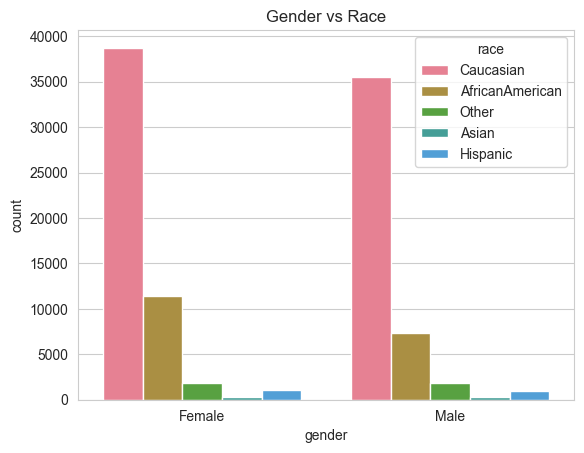

In [1026]:
sns.countplot(x='gender', hue='race', data=df)
plt.title("Gender vs Race")
plt.show()

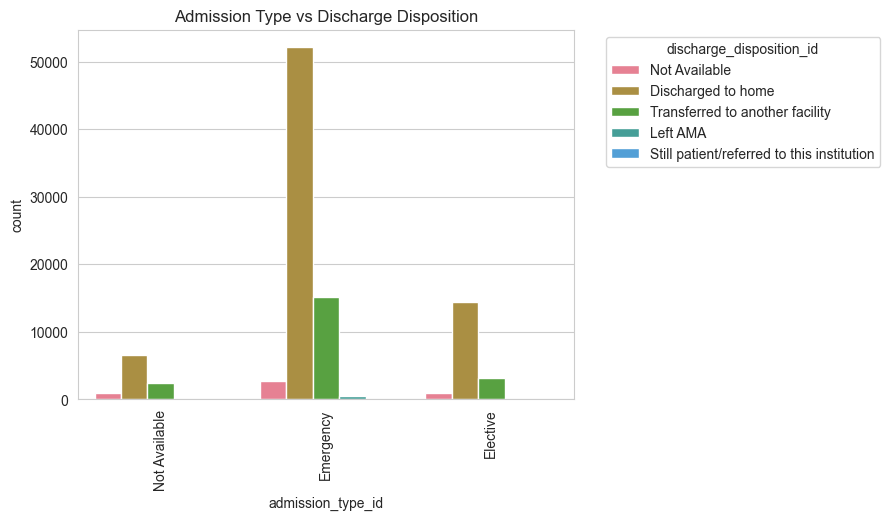

In [1027]:
sns.countplot(x='admission_type_id', hue='discharge_disposition_id', data=df)
plt.title("Admission Type vs Discharge Disposition")
plt.legend(title="discharge_disposition_id",bbox_to_anchor=(1.05, 1),loc='upper left')
plt.xticks(rotation=90)
plt.show()

In [1028]:
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])
    return df

In [1029]:
df_before = df.copy()
for col in num_cols:
    df = cap_outliers(df, col)
for col in num_cols:
    print(f"\n--- {col} ---")
    print("Before:\n", df_before[col].describe())
    print("After:\n", df[col].describe())


--- time_in_hospital ---
Before:
 count    99320.000000
mean         4.379440
std          2.968534
min          1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max         14.000000
Name: time_in_hospital, dtype: float64
After:
 count    99320.000000
mean         4.347805
std          2.877041
min          1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max         12.000000
Name: time_in_hospital, dtype: float64

--- num_lab_procedures ---
Before:
 count    99320.000000
mean        42.907139
std         19.609205
min          1.000000
25%         31.000000
50%         44.000000
75%         57.000000
max        132.000000
Name: num_lab_procedures, dtype: float64
After:
 count    99320.000000
mean        42.899648
std         19.586349
min          1.000000
25%         31.000000
50%         44.000000
75%         57.000000
max         96.000000
Name: num_lab_procedures, dtype: float64

--- num_procedures ---
Before:
 count    99320.

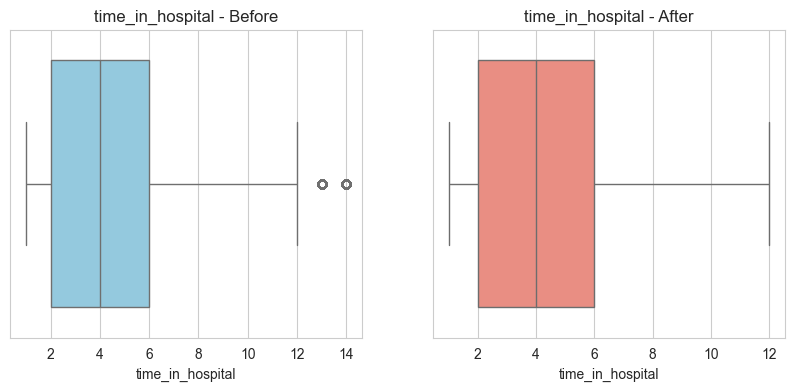

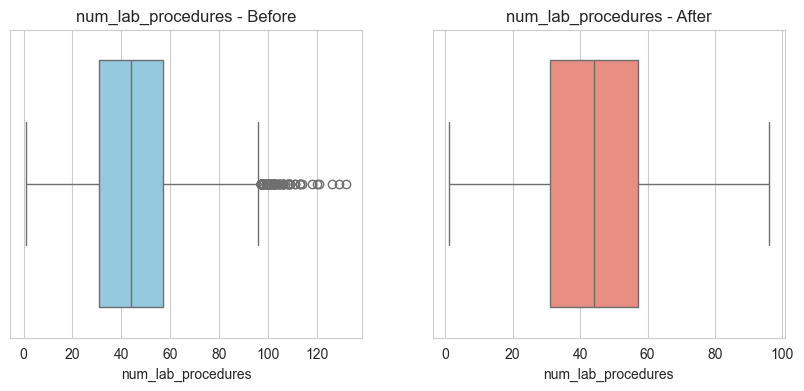

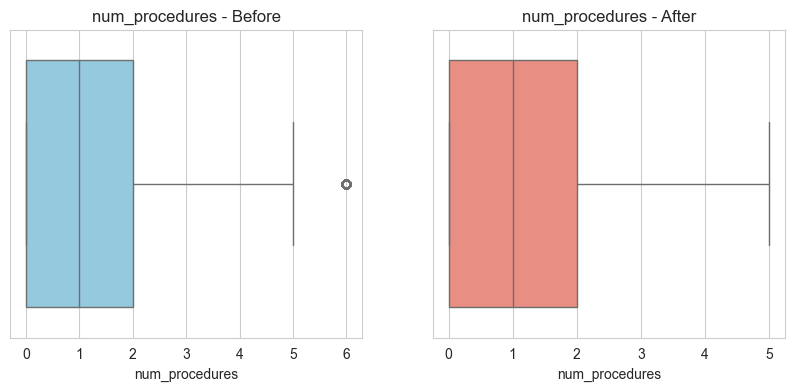

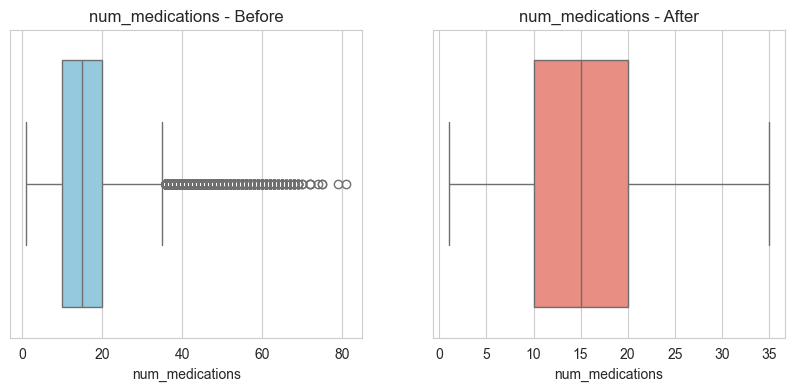

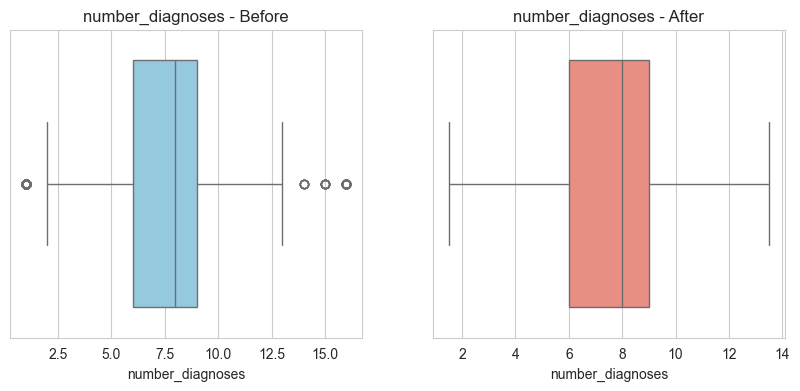

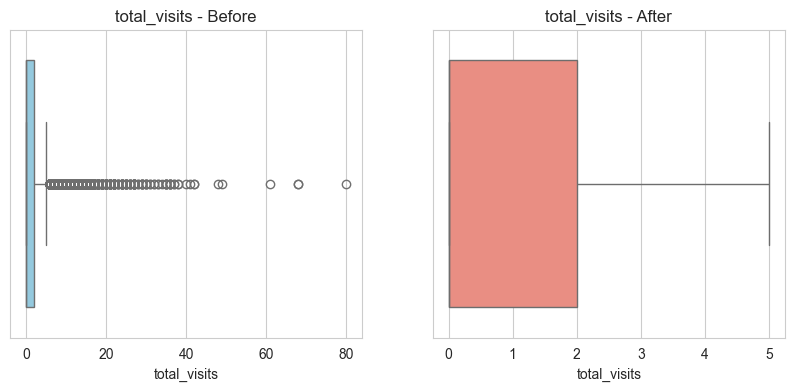

In [1030]:
for col in num_cols:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.boxplot(x=df_before[col], color="skyblue")
    plt.title(f"{col} - Before")
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col], color="salmon")
    plt.title(f"{col} - After")
    plt.show()

In [1031]:
def map_diag(diag):
    if pd.isna(diag) or diag == 'Unknown':
        return 'Unknown'
    try:
        code = float(diag)
    except:
        return 'Other'
    if code == 250: return 'Diabetes'
    elif 390 <= code <= 459 or code == 785: return 'Circulatory'
    elif 460 <= code <= 519 or code == 786: return 'Respiratory'
    elif 520 <= code <= 579 or code == 787: return 'Digestive'
    elif 800 <= code <= 999: return 'Injury'
    elif 710 <= code <= 739: return 'Musculoskeletal'
    elif 580 <= code <= 629 or code == 788: return 'Genitourinary'
    elif 140 <= code <= 239: return 'Neoplasms'
    else: return 'Other'
for col in ['diag_1','diag_2','diag_3']:
    df[col] = df[col].apply(map_diag)

In [1032]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,num_medications,diag_1,diag_2,diag_3,number_diagnoses,insulin,change,diabetesMed,readmitted,total_visits
0,2278392,8222157,Caucasian,Female,[0-10),Not Available,Not Available,Referral,1.0,Other,...,1.0,Other,Unknown,Unknown,1.5,No,No,No,NO,0.0
1,149190,55629189,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency,3.0,Other,...,18.0,Other,Other,Other,9.0,Up,Ch,Yes,>30,0.0
2,64410,86047875,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,Emergency,2.0,Other,...,13.0,Other,Diabetes,Other,6.0,No,No,Yes,NO,3.0
3,500364,82442376,Caucasian,Male,[30-40),Emergency,Discharged to home,Emergency,2.0,Other,...,16.0,Other,Other,Circulatory,7.0,Up,Ch,Yes,NO,0.0
4,16680,42519267,Caucasian,Male,[40-50),Emergency,Discharged to home,Emergency,1.0,Other,...,8.0,Neoplasms,Neoplasms,Diabetes,5.0,Steady,Ch,Yes,NO,0.0


In [1033]:
df.to_csv("../datasets/diabetic_data_clean.csv", index=False)

In [1034]:
df.drop(['encounter_id', 'patient_nbr'], axis=1, inplace=True)

In [1035]:
df['age'] = df['age'].replace({
    '[0-10)': 5,
    '[10-20)': 15,
    '[20-30)': 25,
    '[30-40)': 35,
    '[40-50)': 45,
    '[50-60)': 55,
    '[60-70)': 65,
    '[70-80)': 75,
    '[80-90)': 85,
    '[90-100)': 95
})

In [1036]:
df['readmitted']=df['readmitted'].replace({'NO':0,">30":0,"<30":1})

In [1037]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df = pd.get_dummies(df,columns=['race','admission_type_id','discharge_disposition_id','admission_source_id','payer_code','insulin','change',
                                'diabetesMed'],drop_first=True)

In [1038]:
print(df.dtypes)

gender                                                                   int32
age                                                                      int64
time_in_hospital                                                       float64
num_lab_procedures                                                     float64
num_procedures                                                         float64
num_medications                                                        float64
diag_1                                                                  object
diag_2                                                                  object
diag_3                                                                  object
number_diagnoses                                                       float64
readmitted                                                               int64
total_visits                                                           float64
race_Asian                                          

In [1039]:
df.select_dtypes(exclude=['number']).columns

Index(['diag_1', 'diag_2', 'diag_3', 'race_Asian', 'race_Caucasian',
       'race_Hispanic', 'race_Other', 'admission_type_id_Emergency',
       'admission_type_id_Not Available', 'discharge_disposition_id_Left AMA',
       'discharge_disposition_id_Not Available',
       'discharge_disposition_id_Still patient/referred to this institution',
       'discharge_disposition_id_Transferred to another facility',
       'admission_source_id_Not Available', 'admission_source_id_Referral',
       'admission_source_id_Transferred from hospital', 'payer_code_CH',
       'payer_code_CM', 'payer_code_CP', 'payer_code_DM', 'payer_code_FR',
       'payer_code_HM', 'payer_code_MC', 'payer_code_MD', 'payer_code_MP',
       'payer_code_OG', 'payer_code_OT', 'payer_code_Other', 'payer_code_PO',
       'payer_code_SI', 'payer_code_SP', 'payer_code_UN', 'payer_code_WC',
       'insulin_No', 'insulin_Steady', 'insulin_Up', 'change_No',
       'diabetesMed_Yes'],
      dtype='object')

In [1040]:
df[['diag_1','diag_2','diag_3']].head(10)

,diag_1,diag_2,diag_3
0,Other,Unknown,Unknown
1,Other,Other,Other
2,Other,Diabetes,Other
3,Other,Other,Circulatory
4,Neoplasms,Neoplasms,Diabetes
5,Circulatory,Circulatory,Diabetes
6,Circulatory,Circulatory,Other
7,Circulatory,Respiratory,Diabetes
8,Circulatory,Circulatory,Other
9,Circulatory,Neoplasms,Respiratory


In [1041]:
df_clean = df.copy()
df_ml = pd.get_dummies(df, columns=['diag_1','diag_2','diag_3'], drop_first=True)

In [1042]:
df_ml.to_csv("../datasets/diabetes_data_ml.csv", index=False)